In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Load the Data

In [3]:
data = pd.read_csv('SalaryData_Train.csv')
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data_test = pd.read_csv('SalaryData_Test.csv')
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## EDA

In [5]:
data.shape, data_test.shape

((30161, 14), (15060, 14))

In [6]:
#Information of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
#Information of Data
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
data_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
data['Salary'] = data['Salary'].astype('category')
data['Salary'] = data['Salary'].map({' >50K':'>50K' , ' <=50K':'<=50K'})
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
data_test['Salary'] = data_test['Salary'].astype('category')
data_test['Salary'] = data_test['Salary'].map({' >50K':'>50K' , ' <=50K':'<=50K'})
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [12]:
data['workclass'].value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [13]:
data['education'].value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [14]:
data['educationno'].value_counts()

9     9840
10    6677
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: educationno, dtype: int64

In [15]:
data['maritalstatus'].value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [16]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [17]:
data['relationship'].value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      888
Name: relationship, dtype: int64

In [18]:
data['race'].value_counts()

 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [19]:
data['sex'].value_counts()

 Male      20380
 Female     9781
Name: sex, dtype: int64

In [20]:
data['native'].value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [21]:
data['Salary'].value_counts()

<=50K    22653
>50K      7508
Name: Salary, dtype: int64

### Compare different Feature w.r.t. y

In [22]:
def plot_rate_bar(data,col1,col2):
    
    data_col1 = data.groupby([col1])[col2].value_counts(normalize = True).unstack().reset_index()

    fig, axes = plt.subplots(1, 2 ,figsize= (18,4))
    (ax1,ax2) = axes
    colors = ['#768dc5','#e28743']
    ax1.bar(data_col1[col1], data_col1['>50K'], label = '>50K', color= colors[0])
    ax1.bar(data_col1[col1], data_col1['<=50K'], label = '<=50K',bottom= data_col1['>50K'], color= colors[1])
    ax1.set_title('comparision', fontsize= 15)
    ax1.set_xlabel(xlabel= col1, fontsize= 10)
    ax1.set_ylabel(ylabel= col2, fontsize= 10)
    ax1.tick_params(axis='both', labelsize=10)
    ax1.set_xticklabels(list(data_col1[col1]) , rotation=45)
    ax1.legend()

    # Let's put the annotations inside the bars

    for rect in ax1.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The width of the bar is also not pixels, it's the
        label_text = '{:.2f}'.format(height)

        label_x = x + width / 2
        label_y = y + height / 2
        ax1.text(label_x, label_y, label_text, ha='center', va='center', fontsize= 8)
        
    sns.countplot(x=col1, data=data,hue=col2 , ax = ax2)
    plt.xticks( rotation = 45, fontsize = 12)

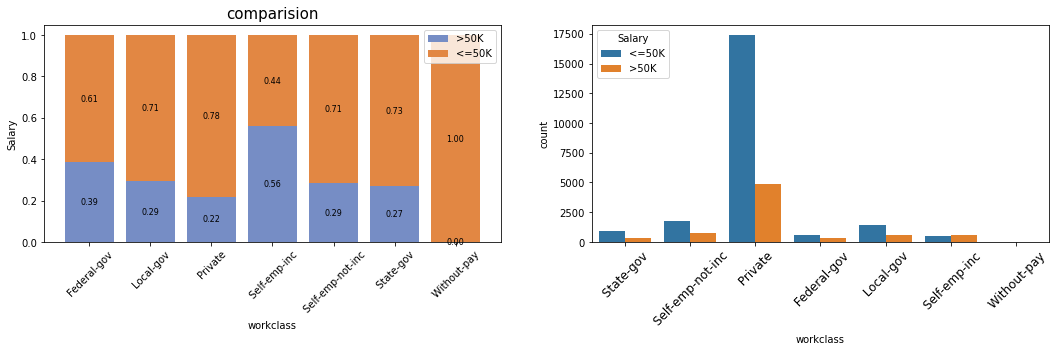

In [23]:
plot_rate_bar(data,'workclass','Salary')

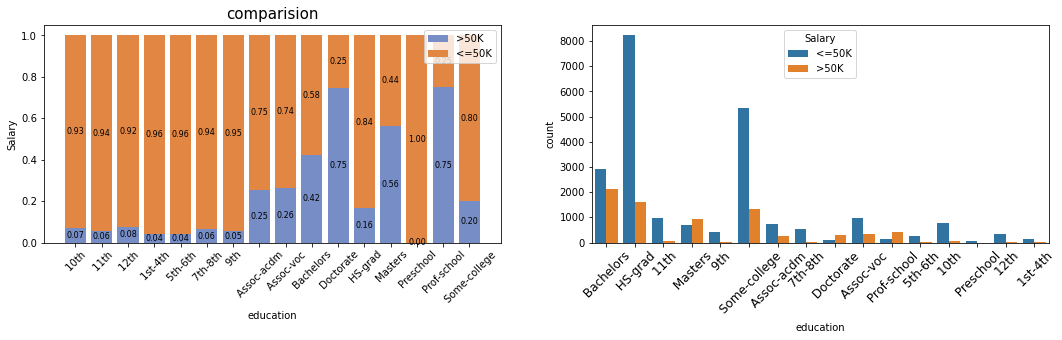

In [24]:
plot_rate_bar(data,'education','Salary')

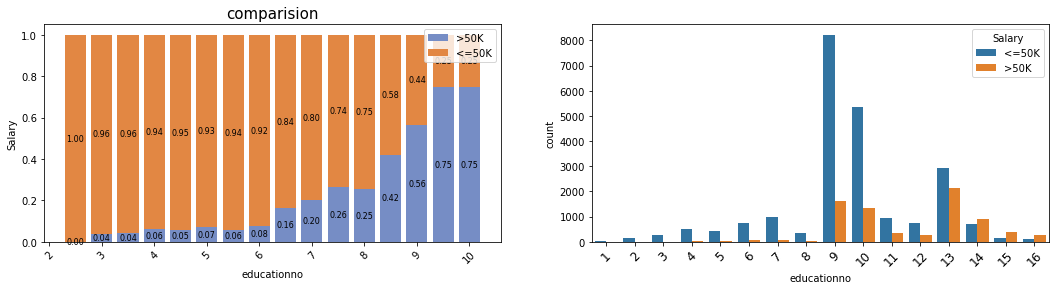

In [25]:
plot_rate_bar(data,'educationno','Salary')

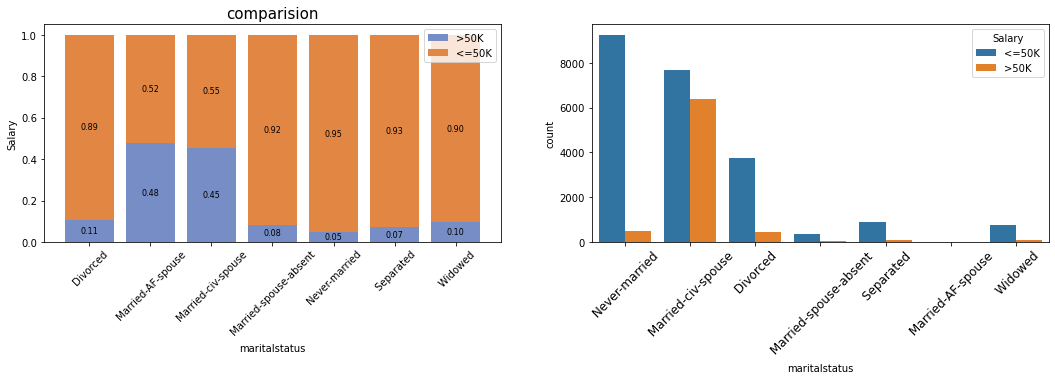

In [26]:
plot_rate_bar(data,'maritalstatus','Salary')

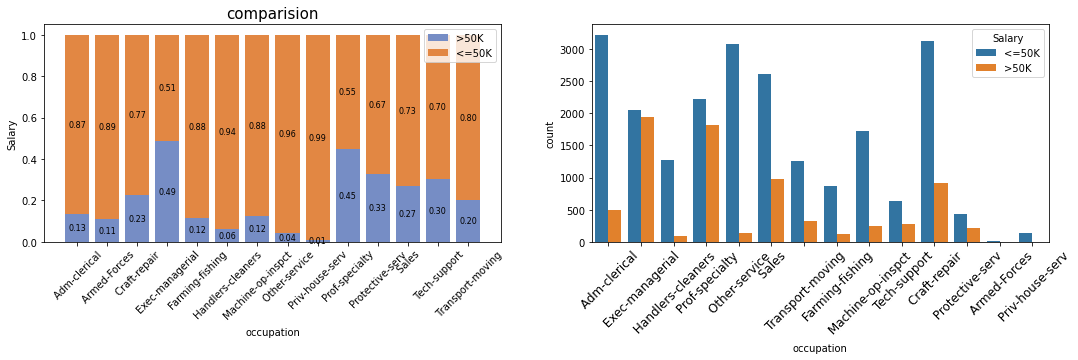

In [27]:
plot_rate_bar(data,'occupation','Salary')

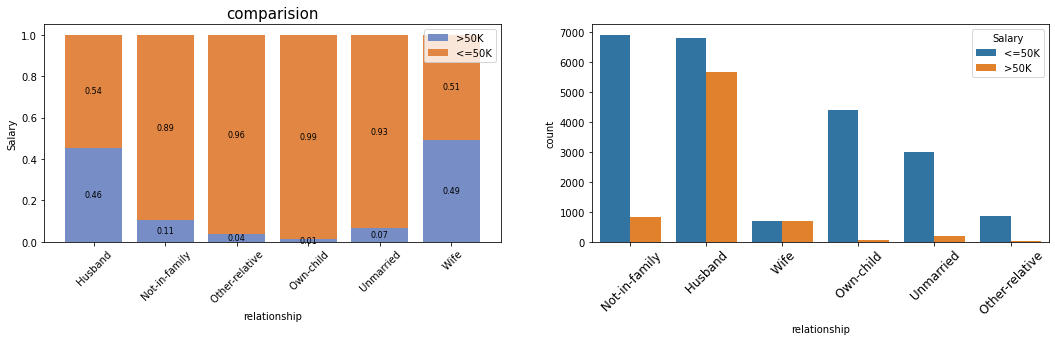

In [28]:
plot_rate_bar(data,'relationship','Salary')

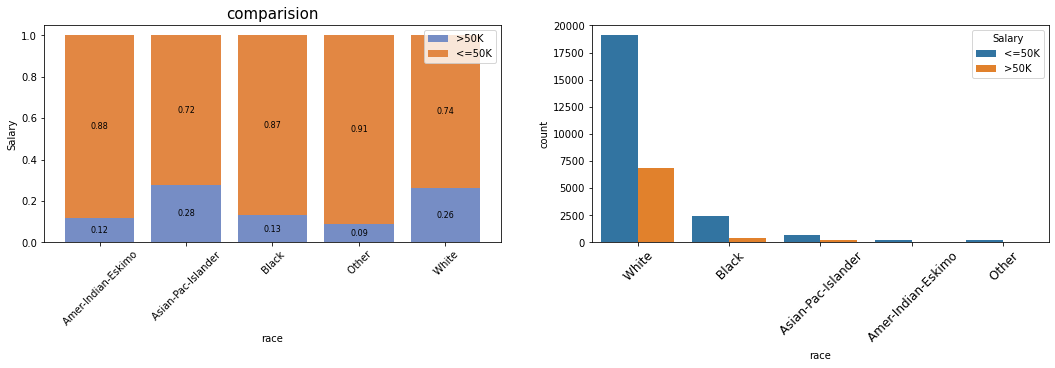

In [29]:
plot_rate_bar(data,'race','Salary')

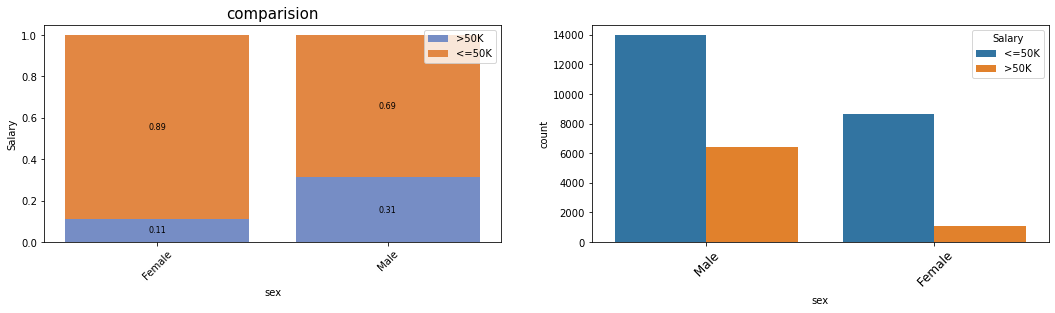

In [30]:
plot_rate_bar(data,'sex','Salary')

In [31]:
# Droping education column because we have no use of that column
data1 = data.drop('education' , axis = 1)
data1 = data1.rename({'educationno':'education'} , axis = 1)
data1.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
# Droping education column because we have no use of that column
data1_test = data_test.drop('education' , axis = 1)
data1_test = data1_test.rename({'educationno':'education'} , axis = 1)
data1_test.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [33]:
des = data1.groupby(['Salary']).agg(['mean' , 'std'])
des

age            education            capitalgain                \
             mean        std      mean       std         mean           std   
Salary                                                                        
<=50K   36.608264  13.464894   9.62910  2.413648   148.900411    936.412426   
>50K    43.959110  10.269633  11.60642  2.368423  3937.679808  14386.060019   

       capitalloss             hoursperweek             
              mean         std         mean        std  
Salary                                                  
<=50K    53.353022  309.947603    39.348563  11.951037  
>50K    193.750666  592.825590    45.706580  10.736987

In [34]:
data_summary = data1.describe()
data_summary.loc['skewness'] = data1.skew()
data_summary.loc['kurtosis'] = data1.kurtosis()
data_summary

,age,education,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000
skewness,0.530180,-0.305378,11.902483,4.528238,0.330856
kurtosis,-0.144760,0.643605,153.661174,19.529284,3.167683


### Data Transformation

In [35]:
data1.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [36]:
num_cols = ['age','capitalgain','capitalloss','hoursperweek']
cat_cols = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
            'race', 'sex','native', 'Salary']
data2 = data1[num_cols]
data2.head()

,age,capitalgain,capitalloss,hoursperweek
0,39,2174,0,40
1,50,0,0,13
2,38,0,0,40
3,53,0,0,40
4,28,0,0,40


In [37]:
data2_test = data1_test[num_cols]
data2_test.head()

,age,capitalgain,capitalloss,hoursperweek
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,34,0,0,30


In [38]:
#Data Transformation i.e. Normalize the data set
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range = (0.1 , 1.1))
minmax = minmax.fit_transform(data2)
data_norm = pd.DataFrame(data = minmax , columns = data2.columns)
data_norm.head()

,age,capitalgain,capitalloss,hoursperweek
0,0.401370,0.12174,0.1,0.497959
1,0.552055,0.10000,0.1,0.222449
2,0.387671,0.10000,0.1,0.497959
3,0.593151,0.10000,0.1,0.497959
4,0.250685,0.10000,0.1,0.497959


In [39]:
data_summary = data1.agg(['skew', 'kurtosis']).transpose()
data_summary

,skew,kurtosis
age,0.530180,-0.144760
education,-0.305378,0.643605
capitalgain,11.902483,153.661174
capitalloss,4.528238,19.529284
hoursperweek,0.330856,3.167683


In [40]:
data_norm_summary = data_norm.agg(['skew', 'kurtosis']).transpose()
data_norm_summary

,skew,kurtosis
age,0.530180,-0.144760
capitalgain,11.902483,153.661174
capitalloss,4.528238,19.529284
hoursperweek,0.330856,3.167683


In [41]:
# Box-Cox Transformation
data_boxcox = pd.DataFrame()
from scipy.stats import boxcox

for i in range(data_norm.shape[1]):
    fitted_data, fitted_lambda = boxcox(data_norm.iloc[:,i])
    data_boxcox[num_cols[i]] = fitted_data

data_boxcox.head()

,age,capitalgain,capitalloss,hoursperweek
0,-0.763583,-3.476271e+15,-5.021739e+11,-0.513941
1,-0.528245,-1.291169e+17,-5.021739e+11,-0.812176
2,-0.787439,-1.291169e+17,-5.021739e+11,-0.513941
3,-0.470926,-1.291169e+17,-5.021739e+11,-0.513941
4,-1.060146,-1.291169e+17,-5.021739e+11,-0.513941


In [42]:
data_boxcox_summary = data_boxcox.agg(['skew', 'kurtosis']).transpose()
data_boxcox_summary

,skew,kurtosis
age,-0.048449,-0.673289
capitalgain,3.009502,7.072617
capitalloss,4.266407,16.203316
hoursperweek,0.195392,2.985234


In [43]:
# sqrt Transformation
data_sqrt = pd.DataFrame()

for i in range(data_norm.shape[1]):
    fitted_data= np.power(data_norm.iloc[:,i] , 1/2)
    data_sqrt[num_cols[i]] = fitted_data
    
data_sqrt.head()

,age,capitalgain,capitalloss,hoursperweek
0,0.633538,0.348913,0.316228,0.705662
1,0.743004,0.316228,0.316228,0.471645
2,0.622633,0.316228,0.316228,0.705662
3,0.770163,0.316228,0.316228,0.705662
4,0.500684,0.316228,0.316228,0.705662


In [44]:
data_sqrt_summary = data_sqrt.agg(['skew', 'kurtosis']).transpose()
data_sqrt_summary

,skew,kurtosis
age,0.044797,-0.654730
capitalgain,9.315011,103.305343
capitalloss,4.401446,17.774343
hoursperweek,-0.562376,2.844333


In [45]:
# cuberoot Transformation
data_cbrt = pd.DataFrame()

for i in range(data_norm.shape[1]):
    fitted_data= np.power(data_norm.iloc[:,i] , 1/3)
    data_cbrt[num_cols[i]] = fitted_data
    
data_cbrt.head()

,age,capitalgain,capitalloss,hoursperweek
0,0.737646,0.495615,0.464159,0.792619
1,0.820340,0.464159,0.464159,0.605913
2,0.729157,0.464159,0.464159,0.792619
3,0.840211,0.464159,0.464159,0.792619
4,0.630535,0.464159,0.464159,0.792619


In [46]:
data_cbrt_summary = data_cbrt.agg(['skew', 'kurtosis']).transpose()
data_cbrt_summary

,skew,kurtosis
age,-0.116603,-0.671272
capitalgain,8.348907,85.335302
capitalloss,4.374958,17.440201
hoursperweek,-0.861213,3.206847


In [47]:
# log Transformation
data_log = pd.DataFrame()

for i in range(data_norm.shape[1]):
    fitted_data= np.log(data_norm.iloc[:,i])
    data_log[num_cols[i]] = fitted_data
    
    
data_log.head()

,age,capitalgain,capitalloss,hoursperweek
0,-0.912872,-2.105866,-2.302585,-0.697237
1,-0.594108,-2.302585,-2.302585,-1.503058
2,-0.947598,-2.302585,-2.302585,-0.697237
3,-0.522307,-2.302585,-2.302585,-0.697237
4,-1.383558,-2.302585,-2.302585,-0.697237


In [48]:
data_log_summary = data_log.agg(['skew', 'kurtosis']).transpose()
data_log_summary

,skew,kurtosis
age,-0.443345,-0.483443
capitalgain,6.616611,54.878011
capitalloss,4.336885,16.980817
hoursperweek,-1.469703,4.715343


In [49]:
# Mixed transformation [0,4] we take from boxcox and remaining two we take from logerithmic

trf_data = data_boxcox[['age','hoursperweek']]
trf_data[['capitalgain','capitalloss']] = data_log[['capitalgain','capitalloss']]
trf_data.head()

,age,hoursperweek,capitalgain,capitalloss
0,-0.763583,-0.513941,-2.105866,-2.302585
1,-0.528245,-0.812176,-2.302585,-2.302585
2,-0.787439,-0.513941,-2.302585,-2.302585
3,-0.470926,-0.513941,-2.302585,-2.302585
4,-1.060146,-0.513941,-2.302585,-2.302585


In [50]:
# Mixed transformation [0,4] we take from boxcox and remaining two we take from logerithmic for testing dataset
minmax = MinMaxScaler(feature_range = (0.1 , 1.1))
minmax = minmax.fit_transform(data2_test)
data_norm_test = pd.DataFrame(data = minmax , columns = data2_test.columns)
data_norm_test.head()

data_boxcox_test = pd.DataFrame()
for i in range(data_norm_test.shape[1]):
    fitted_data, fitted_lambda = boxcox(data_norm_test.iloc[:,i])
    data_boxcox_test[num_cols[i]] = fitted_data


data_log_test = pd.DataFrame()
for i in range(data_norm_test.shape[1]):
    fitted_data= np.log(data_norm_test.iloc[:,i])
    data_log_test[num_cols[i]] = fitted_data
    
trf_data_test = data_boxcox_test[['age','hoursperweek']]
trf_data_test[['capitalgain','capitalloss']] = data_log_test[['capitalgain','capitalloss']]
trf_data_test.head()

,age,hoursperweek,capitalgain,capitalloss
0,-1.161191,-0.515638,-2.302585,-2.302585
1,-0.788396,-0.408171,-2.302585,-2.302585
2,-1.061970,-0.515638,-2.302585,-2.302585
3,-0.651682,-0.515638,-1.732279,-2.302585
4,-0.889501,-0.625033,-2.302585,-2.302585


In [51]:
data1.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [52]:
#Final Training Data
final_data = trf_data.copy()
final_data[cat_cols] = data1[cat_cols]
final_data['Salary'] = final_data['Salary'].map({'<=50K':0 , '>50K':1})
final_data.head()

,age,hoursperweek,capitalgain,capitalloss,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,-0.763583,-0.513941,-2.105866,-2.302585,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0
1,-0.528245,-0.812176,-2.302585,-2.302585,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0
2,-0.787439,-0.513941,-2.302585,-2.302585,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0
3,-0.470926,-0.513941,-2.302585,-2.302585,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0
4,-1.060146,-0.513941,-2.302585,-2.302585,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0


In [53]:
#Final Testing Data
final_data_test = trf_data_test.copy()
final_data_test[cat_cols] = data1_test[cat_cols]
final_data_test['Salary'] = final_data_test['Salary'].map({'<=50K':0 , '>50K':1})
final_data_test.head()

,age,hoursperweek,capitalgain,capitalloss,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,-1.161191,-0.515638,-2.302585,-2.302585,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,0
1,-0.788396,-0.408171,-2.302585,-2.302585,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,0
2,-1.061970,-0.515638,-2.302585,-2.302585,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,1
3,-0.651682,-0.515638,-1.732279,-2.302585,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,1
4,-0.889501,-0.625033,-2.302585,-2.302585,Private,6,Never-married,Other-service,Not-in-family,White,Male,United-States,0


### Encoded using Label Encoder

In [54]:
final_data.head()

,age,hoursperweek,capitalgain,capitalloss,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,-0.763583,-0.513941,-2.105866,-2.302585,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0
1,-0.528245,-0.812176,-2.302585,-2.302585,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0
2,-0.787439,-0.513941,-2.302585,-2.302585,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0
3,-0.470926,-0.513941,-2.302585,-2.302585,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0
4,-1.060146,-0.513941,-2.302585,-2.302585,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0


In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

final_data.iloc[:,4] = le.fit_transform(final_data.iloc[:,4])
final_data.iloc[:,6] = le.fit_transform(final_data.iloc[:,6])
final_data.iloc[:,7] = le.fit_transform(final_data.iloc[:,7])
final_data.iloc[:,8] = le.fit_transform(final_data.iloc[:,8])
final_data.iloc[:,9] = le.fit_transform(final_data.iloc[:,9])
final_data.iloc[:,10] = le.fit_transform(final_data.iloc[:,10])
final_data.iloc[:,11] = le.fit_transform(final_data.iloc[:,11])

final_data.head()

,age,hoursperweek,capitalgain,capitalloss,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,-0.763583,-0.513941,-2.105866,-2.302585,5,13,4,0,1,4,1,37,0
1,-0.528245,-0.812176,-2.302585,-2.302585,4,13,2,3,0,4,1,37,0
2,-0.787439,-0.513941,-2.302585,-2.302585,2,9,0,5,1,4,1,37,0
3,-0.470926,-0.513941,-2.302585,-2.302585,2,7,2,5,0,2,1,37,0
4,-1.060146,-0.513941,-2.302585,-2.302585,2,13,2,9,5,2,0,4,0


In [56]:
final_data.isnull().sum()

age              0
hoursperweek     0
capitalgain      0
capitalloss      0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [57]:
final_data_test.iloc[:,4] = le.fit_transform(final_data_test.iloc[:,4])
final_data_test.iloc[:,6] = le.fit_transform(final_data_test.iloc[:,6])
final_data_test.iloc[:,7] = le.fit_transform(final_data_test.iloc[:,7])
final_data_test.iloc[:,8] = le.fit_transform(final_data_test.iloc[:,8])
final_data_test.iloc[:,9] = le.fit_transform(final_data_test.iloc[:,9])
final_data_test.iloc[:,10] = le.fit_transform(final_data_test.iloc[:,10])
final_data_test.iloc[:,11] = le.fit_transform(final_data_test.iloc[:,11])

final_data_test.head()

,age,hoursperweek,capitalgain,capitalloss,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,-1.161191,-0.515638,-2.302585,-2.302585,2,7,4,6,3,2,1,37,0
1,-0.788396,-0.408171,-2.302585,-2.302585,2,9,2,4,0,4,1,37,0
2,-1.061970,-0.515638,-2.302585,-2.302585,1,12,2,10,0,4,1,37,1
3,-0.651682,-0.515638,-1.732279,-2.302585,2,10,2,6,0,2,1,37,1
4,-0.889501,-0.625033,-2.302585,-2.302585,2,6,4,7,1,4,1,37,0


### Feature Engineering

In [58]:
from sklearn.tree import  DecisionTreeClassifier

In [59]:
# Spliting into X and y
X = final_data.iloc[:,:-1]
y = final_data.iloc[:,-1]

In [60]:
#Feature Extraction 
feature_model = DecisionTreeClassifier()
feature_model.fit(X,y)

DecisionTreeClassifier()

In [61]:
np.set_printoptions(precision=3)
print(feature_model.feature_importances_)

[0.175 0.099 0.127 0.042 0.049 0.146 0.013 0.082 0.22  0.021 0.006 0.02 ]


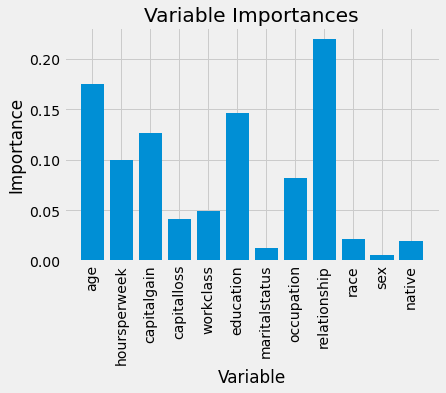

In [62]:
# Set the style
plt.style.use('fivethirtyeight')

importances = feature_model.feature_importances_
feature_list = list(X.columns)

# list of x locations for plotting
X_values = list(range(len(importances)))
# Make a bar chart
plt.bar(X_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(X_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Ploting data in 2D using t-SNE

In [63]:
from sklearn.manifold import TSNE

In [64]:
# Spliting into X and y
X = final_data.iloc[:,:-1]
y = final_data.iloc[:,-1]

In [65]:
data_tsne = TSNE(n_components = 2).fit_transform(X)
data_tsne = pd.DataFrame(data_tsne , columns =['tsne1','tsne2'])
data_tsne['y'] = y
data_tsne

,tsne1,tsne2,y
0,27.490656,37.907795,0
1,6.961733,-80.921616,0
2,1.043281,46.030754,0
3,-24.879372,47.582733,0
4,67.526741,-40.181614,0
...,...,...,...
30156,27.411833,-37.758957,0
30157,77.633713,15.911640,1
30158,35.049454,58.712021,0
30159,35.175140,73.818626,0


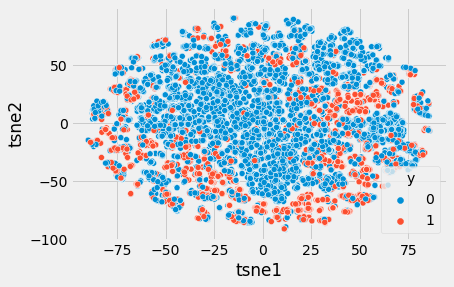

In [66]:
sns.scatterplot(x='tsne1', y='tsne2', data=data_tsne , hue = data_tsne.y)
plt.show()

## Model Building

In [67]:
from sklearn.model_selection import train_test_split , GridSearchCV , KFold , cross_val_score ,RandomizedSearchCV  
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report , accuracy_score , f1_score,precision_score,recall_score

In [68]:
final_data.head()

,age,hoursperweek,capitalgain,capitalloss,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,-0.763583,-0.513941,-2.105866,-2.302585,5,13,4,0,1,4,1,37,0
1,-0.528245,-0.812176,-2.302585,-2.302585,4,13,2,3,0,4,1,37,0
2,-0.787439,-0.513941,-2.302585,-2.302585,2,9,0,5,1,4,1,37,0
3,-0.470926,-0.513941,-2.302585,-2.302585,2,7,2,5,0,2,1,37,0
4,-1.060146,-0.513941,-2.302585,-2.302585,2,13,2,9,5,2,0,4,0


In [69]:
# Spliting into X and y
X = final_data.iloc[:,:-1]
y = final_data.iloc[:,-1]

In [70]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,stratify = y, random_state = 42)

In [71]:
kfold = KFold(n_splits=5)

model = SVC(class_weight = 'balanced' , random_state = 42)
result = cross_val_score(model,X,y,cv=kfold)

print(result.mean())

0.7423496092006783


### Hyperparameter Tunning

In [72]:
kfold = KFold(n_splits=5)

clf = SVC(class_weight = 'balanced' , random_state = 42)

param_grid ={'kernel':['rbf'], 'gamma':[0.1,0.01], 'C':[10,0.1]}

gsv = RandomizedSearchCV(clf,param_grid,cv=kfold)
gsv.fit(X_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=SVC(class_weight='balanced', random_state=42),
                   param_distributions={'C': [10, 0.1], 'gamma': [0.1, 0.01],
                                        'kernel': ['rbf']})

In [73]:
print(gsv.best_score_)
print(gsv.best_estimator_)
print(gsv.best_params_)

grid_predictions = gsv.predict(X_test)
 
# print classification report
print('\n\n',classification_report(y_test, grid_predictions))

0.7946786598498203
SVC(C=10, class_weight='balanced', gamma=0.1, random_state=42)
{'kernel': 'rbf', 'gamma': 0.1, 'C': 10}


               precision    recall  f1-score   support

           0       0.93      0.80      0.86      4531
           1       0.57      0.81      0.67      1502

    accuracy                           0.80      6033
   macro avg       0.75      0.80      0.76      6033
weighted avg       0.84      0.80      0.81      6033



In [74]:
final_model = gsv.best_estimator_

final_model.fit(X,y)

SVC(C=10, class_weight='balanced', gamma=0.1, random_state=42)

In [75]:
# Spliting into X and y for Test Data
X_test = final_data_test.iloc[:,:-1]
y_test = final_data_test.iloc[:,-1]

X_test.shape, y_test.shape

((15060, 12), (15060,))

In [76]:
y_predict = final_model.predict(X_test)

In [77]:
print('Testing Accuracy of CategoricalNB: ', accuracy_score(y_test, y_predict))
print('Testing F1-Score of CategoricalNB: ', f1_score(y_test, y_predict))
print('Training Precision : ', precision_score(y_test, y_predict))
print('Training Recall : ', recall_score(y_test, y_predict))

Testing Accuracy of CategoricalNB:  0.7968791500664011
Testing F1-Score of CategoricalNB:  0.6640307523338824
Training Precision :  0.5592969472710453
Training Recall :  0.817027027027027


In [78]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85     11360
           1       0.56      0.82      0.66      3700

    accuracy                           0.80     15060
   macro avg       0.74      0.80      0.76     15060
weighted avg       0.84      0.80      0.81     15060

